In [1]:
import pandas as pd
import pandas.util.testing as tm
import nltk
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot

C:\Users\duart\AppData\Local\conda\conda\envs\testEnv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


## Visualize initial data

In [2]:
data = pd.read_csv("drake_data.csv", sep = ",")

In [3]:
# read data and drop null values in album, lyrics and track views

data = pd.read_csv("drake_data.csv")
data.dropna(subset = ["album", "lyrics", "track_views"], inplace = True)

# visualize data
data.head()

,album,lyrics_title,lyrics_url,lyrics,track_views
0,Certified Lover Boy,Certified Lover Boy* Lyrics,https://genius.com/Drake-certified-lover-boy-l...,[Verse]\nPut my feelings on ice\nAlways been a...,8.7K
1,Certified Lover Boy,Like I’m Supposed To/Do Things Lyrics,https://genius.com/Drake-like-im-supposed-to-d...,[Verse]\nHands are tied\nSomeone's in my ear f...,38.8K
2,Certified Lover Boy,Not Around Lyrics,https://genius.com/Drake-not-around-lyrics,"[Intro]\nYeah, we back\nWassup ladies?\nSwisha...",129.8K
3,Certified Lover Boy,In the Cut (Ft. Roddy Ricch) Lyrics,https://genius.com/Drake-in-the-cut-lyrics,"[Intro: Drake]\nAyy, yeah\nPipe this shit up a...",72.1K
4,Certified Lover Boy,Zodiac Sign (Ft. Jessie Reyez) Lyrics,https://genius.com/Drake-zodiac-sign-lyrics,[Verse 1: Drake]\nYou ask how many girls I bee...,54.8K


In [4]:
data["lyrics"][8]

"[Intro]\nPreviously on Ready To Die\n\n[Chorus]\nNever had a lot, this is all I need\nPeople never care\u2005'til\u2005it's R.I.P\nNiggas turned\u2005they back on me for no\u2005good reason\nLoyalty is priceless and it's all I need\nCan't burn a bridge just to light my way\nLotta 42 on the flights I'm takin'\nPourin' out my soul and it might sound crazy\nLotta fallin' outs help me build foundation\nNever had a lot, this is all I need\nPeople never care 'til it's R.I.P\nNiggas turned they back on me for no good reason\nNever had a lot, this is all I need\n\n[Verse 1]\nLost individuals is all I see\nGrab the top spot like pardon my reach\nWoke up one day and it was all on me\nIf it comes down, it's gon' fall on me\nLotta 42 on the flights I'm takin'\nLong way down from the heights I'm chasin'\nJust touched down, I was lights out in Vegas\nGirls checkin' in 'cause my lifestyle dangerous\nHard to tell people that I'm all out of favors\nCall me for songs or they call me for paper\nTurnin' 

## Clean predictor variable and visualize it

In [5]:
# create function to make track_views into an actual number

def clean_views(text):
    if "K" in text:
        return float(text[:-1]) * 1000
    elif "M" in text:
        return float(text[:-1]) * 1000000
    else:
        return float(text)

# apply it to the track_views column
    
data["track_views_clean"] = data["track_views"].apply(lambda x: clean_views(x))
data.head()

,album,lyrics_title,lyrics_url,lyrics,track_views,track_views_clean
0,Certified Lover Boy,Certified Lover Boy* Lyrics,https://genius.com/Drake-certified-lover-boy-l...,[Verse]\nPut my feelings on ice\nAlways been a...,8.7K,8700.0
1,Certified Lover Boy,Like I’m Supposed To/Do Things Lyrics,https://genius.com/Drake-like-im-supposed-to-d...,[Verse]\nHands are tied\nSomeone's in my ear f...,38.8K,38800.0
2,Certified Lover Boy,Not Around Lyrics,https://genius.com/Drake-not-around-lyrics,"[Intro]\nYeah, we back\nWassup ladies?\nSwisha...",129.8K,129800.0
3,Certified Lover Boy,In the Cut (Ft. Roddy Ricch) Lyrics,https://genius.com/Drake-in-the-cut-lyrics,"[Intro: Drake]\nAyy, yeah\nPipe this shit up a...",72.1K,72100.0
4,Certified Lover Boy,Zodiac Sign (Ft. Jessie Reyez) Lyrics,https://genius.com/Drake-zodiac-sign-lyrics,[Verse 1: Drake]\nYou ask how many girls I bee...,54.8K,54800.0


In [6]:
# Get min and max values

min_views = data['track_views_clean'].min()
max_views = data['track_views_clean'].max()

print(f"Max value for track views: {min_views} / Min value for track views: {max_views}")

Max value for track views: 5900.0 / Min value for track views: 8500000.0


In [7]:
data["y_model"] = data["track_views_clean"].apply(lambda d: math.log(d))

(array([0.10654774, 0.09132663, 0.08117923, 0.08117923, 0.07103183,
        0.19787437, 0.2841273 , 0.2942747 , 0.13191625, 0.03551591]),
 array([ 8.68270763,  9.40999454, 10.13728145, 10.86456836, 11.59185527,
        12.31914218, 13.04642908, 13.77371599, 14.5010029 , 15.22828981,
        15.95557672]),
 <a list of 10 Patch objects>)

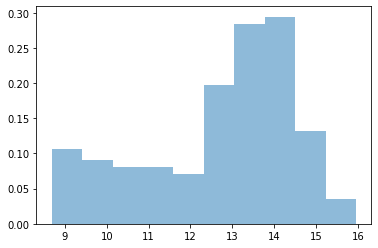

In [8]:
pyplot.hist(data['y_model'], alpha=0.5, density=True, label='Track_views')

The initial track views data is skewed to the right significantly. With the log transformation, we get more evenly distributed data, even though it is still not a perfect normal distribution

In [33]:
data["y_binary"] = data["track_views_clean"].apply(lambda d: 1 if d > 1000000 else 0)

## Further investigation into the data

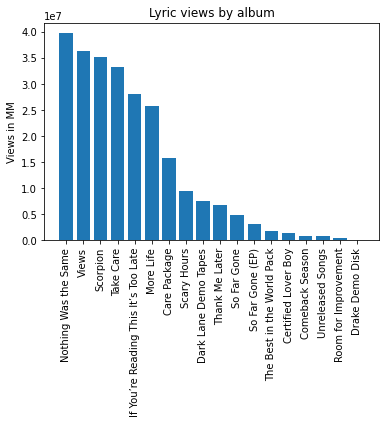

In [9]:
# Create a bar chart by album

by_album = data[["album", "track_views_clean"]].groupby(by = "album").sum().reset_index().sort_values(by = "track_views_clean", ascending = False)
pyplot.bar(x = by_album["album"], height = by_album["track_views_clean"])
pyplot.title(f"Lyric views by album")
pyplot.ylabel(f"Views in MM")
pyplot.xticks(rotation = "vertical")
pyplot.show()

# as expected, data is considerably skewed to the left

Looking into albums, we can swee that there is a stark difference in the views depending on the different albums. However, to predict track views, this variable doesnt translate much to other artists, therefore we will not use an album to represent variables

In [10]:
# Check if all lyrics are coming from genius

genius = len(data) == len(data[data["lyrics_url"].str.contains("genius.com")])
print(genius)

True


In [11]:
# Show how many song titles have popular keywords

keywords = ["love", "yeah", "fuck", "hell"]
keyword_count = {}

data["lower_title"] = data["lyrics_title"].apply(lambda d: d.lower())

for keyword in keywords:
    count = len(data[data["lower_title"].str.contains(keyword)])
    keyword_count[keyword] = count

print(keyword_count)

{'love': 9, 'yeah': 0, 'fuck': 1, 'hell': 0}


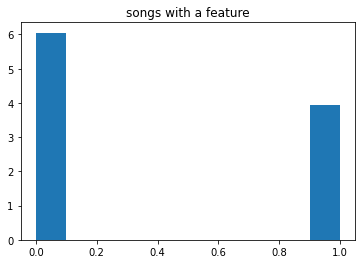

In [12]:
# Show how many songs have someone featuring another singer impact 

data["feat_binary"] = data["lyrics_title"].apply(lambda d: 1 if "Ft." in d else 0)
pyplot.hist(data["feat_binary"], density = True)
pyplot.title(f"songs with a feature")
pyplot.show()

# There seems to be an even distribution

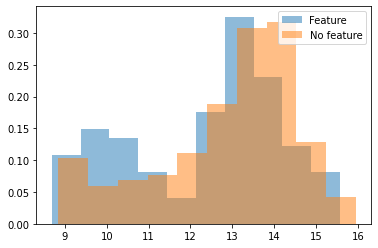

In [13]:
# Crosscheck it against track views

import numpy as np

pyplot.hist(data[data['feat_binary']==1]['y_model'], alpha=0.5, density=True, label='Feature')
pyplot.hist(data[data['feat_binary']==0]['y_model'], alpha=0.5, density=True, label='No feature')
pyplot.legend(loc='upper right')
pyplot.show()

In [14]:
# Count verses and intro

sections = ["[Verse", "[Intro", "[Chorus"]

for section in sections:
    title = section[1:]
    data[title] = data["lyrics"].apply(lambda d: d.count(section))
    data[title + "_binary"] = data[title].apply(lambda d: 1 if d > 0 else 0)

# add additional binary column
data["more_than_2_verses"] = data["Verse"].apply(lambda d: 1 if d > 2 else 0)
data.head()

,album,lyrics_title,lyrics_url,lyrics,track_views,track_views_clean,y_model,lower_title,feat_binary,Verse,Verse_binary,Intro,Intro_binary,Chorus,Chorus_binary,more_than_2_verses
0,Certified Lover Boy,Certified Lover Boy* Lyrics,https://genius.com/Drake-certified-lover-boy-l...,[Verse]\nPut my feelings on ice\nAlways been a...,8.7K,8700.0,9.071078,certified lover boy* lyrics,0,1,1,0,0,0,0,0
1,Certified Lover Boy,Like I’m Supposed To/Do Things Lyrics,https://genius.com/Drake-like-im-supposed-to-d...,[Verse]\nHands are tied\nSomeone's in my ear f...,38.8K,38800.0,10.566176,like i’m supposed to/do things lyrics,0,1,1,0,0,2,1,0
2,Certified Lover Boy,Not Around Lyrics,https://genius.com/Drake-not-around-lyrics,"[Intro]\nYeah, we back\nWassup ladies?\nSwisha...",129.8K,129800.0,11.773750,not around lyrics,0,2,1,1,1,3,1,0
3,Certified Lover Boy,In the Cut (Ft. Roddy Ricch) Lyrics,https://genius.com/Drake-in-the-cut-lyrics,"[Intro: Drake]\nAyy, yeah\nPipe this shit up a...",72.1K,72100.0,11.185809,in the cut (ft. roddy ricch) lyrics,1,2,1,1,1,2,1,0
4,Certified Lover Boy,Zodiac Sign (Ft. Jessie Reyez) Lyrics,https://genius.com/Drake-zodiac-sign-lyrics,[Verse 1: Drake]\nYou ask how many girls I bee...,54.8K,54800.0,10.911445,zodiac sign (ft. jessie reyez) lyrics,1,2,1,0,0,0,0,0


In [15]:
# Check amount of lines

data["lines"] = data["lyrics"].apply(lambda d: d.count("\n"))
line_average = data["lines"].mean()
data["line_binary"] = data["lines"].apply(lambda d: 1 if d > line_average else 0)

In [16]:
data.head()

,album,lyrics_title,lyrics_url,lyrics,track_views,track_views_clean,y_model,lower_title,feat_binary,Verse,Verse_binary,Intro,Intro_binary,Chorus,Chorus_binary,more_than_2_verses,lines,line_binary
0,Certified Lover Boy,Certified Lover Boy* Lyrics,https://genius.com/Drake-certified-lover-boy-l...,[Verse]\nPut my feelings on ice\nAlways been a...,8.7K,8700.0,9.071078,certified lover boy* lyrics,0,1,1,0,0,0,0,0,4,0
1,Certified Lover Boy,Like I’m Supposed To/Do Things Lyrics,https://genius.com/Drake-like-im-supposed-to-d...,[Verse]\nHands are tied\nSomeone's in my ear f...,38.8K,38800.0,10.566176,like i’m supposed to/do things lyrics,0,1,1,0,0,2,1,0,34,0
2,Certified Lover Boy,Not Around Lyrics,https://genius.com/Drake-not-around-lyrics,"[Intro]\nYeah, we back\nWassup ladies?\nSwisha...",129.8K,129800.0,11.773750,not around lyrics,0,2,1,1,1,3,1,0,65,0
3,Certified Lover Boy,In the Cut (Ft. Roddy Ricch) Lyrics,https://genius.com/Drake-in-the-cut-lyrics,"[Intro: Drake]\nAyy, yeah\nPipe this shit up a...",72.1K,72100.0,11.185809,in the cut (ft. roddy ricch) lyrics,1,2,1,1,1,2,1,0,48,0
4,Certified Lover Boy,Zodiac Sign (Ft. Jessie Reyez) Lyrics,https://genius.com/Drake-zodiac-sign-lyrics,[Verse 1: Drake]\nYou ask how many girls I bee...,54.8K,54800.0,10.911445,zodiac sign (ft. jessie reyez) lyrics,1,2,1,0,0,0,0,0,49,0


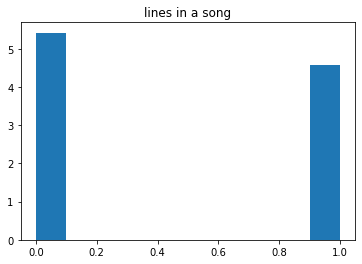

In [17]:
# Crosscheck it against 

pyplot.hist(data["line_binary"], density = True)
pyplot.title(f"lines in a song")
pyplot.show()

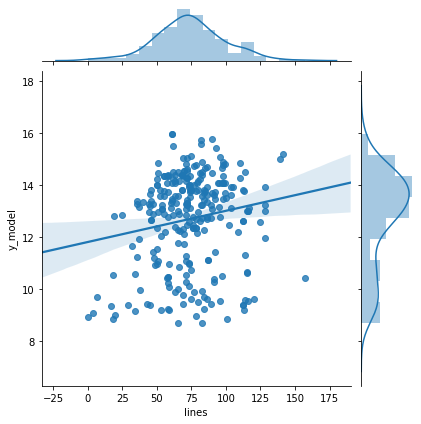

In [18]:
sns.jointplot(x="lines",y="y_model",data=data, kind="reg")

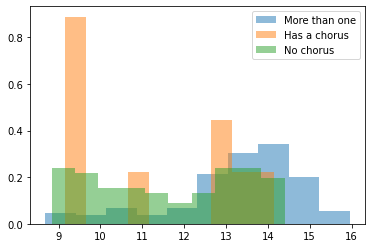

In [19]:
pyplot.hist(data[data['Chorus']>=2]['y_model'], alpha=0.5, density=True, label='More than one')
pyplot.hist(data[data['Chorus']==1]['y_model'], alpha=0.5, density=True, label='Has a chorus')
pyplot.hist(data[data['Chorus']==0]['y_model'], alpha=0.5, density=True, label='No chorus')
pyplot.legend(loc='upper right')
pyplot.show()

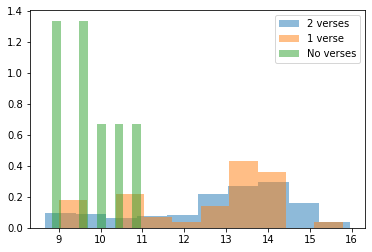

In [20]:
pyplot.hist(data[data['Verse']>=2]['y_model'], alpha=0.5, density=True, label='2 verses')
pyplot.hist(data[data['Verse']==1]['y_model'], alpha=0.5, density=True, label='1 verse')
pyplot.hist(data[data['Verse']==0]['y_model'], alpha=0.5, density=True, label='No verses')
pyplot.legend(loc='upper right')
pyplot.show()

## NLP Horseshoe

In [21]:
# Clean lyrics according to words shown in the lyrics

from unidecode import unidecode
import string
import re

def clean_lyrics(text, language = "english"):
    """
    This function will create lyrics ready for tokenization
    
    Text: lyrics in string format
    Language: language of lyrics (know which stopwords to remove)
    """
    
    assert type(language) == str, "youre not giving a lyric string"
    assert type(language) == str, "the language format you selected is not valid"
    
    # Clean text using the unidecode package (how text is processed)
    text_clean = unidecode(text)
    
    # Replace some string values to make the cleaning easier
    text_clean = text_clean.replace("\n", " ").replace("[", "<").replace("]", ">")
    
    # Replace hip hop linguicisms
    text_clean = text_clean.replace("n' ", "ng ")
    text_clean = text_clean.replace("Ima", "I'm a")
    
    # Replace everything in <> to space
    text_clean = re.sub('<[^>]+>', " ", text_clean)
    
    # Remove all punctuation
    text_clean = "".join([word.lower() for word in text_clean if word not in string.punctuation])
    
    # Tokenize the text
    text_clean = re.split("\W+", text_clean)[1:]
    
    # Remove all stopwords
    stopwords = nltk.corpus.stopwords.words(language)
    text_clean = [word for word in text_clean if word not in stopwords]
    
    # Apply Porter Stemmer
    ps = nltk.PorterStemmer()
    stem_text = [ps.stem(word) for word in text_clean]
    
    return stem_text

In [22]:
def lemmatizer(tokenized_text, wn = nltk.WordNetLemmatizer()):
    lem_text = [wn.lemmatize(word) for word in tokenized_text]
    return lem_text

def stemmatizer(tokenized_text, ps = nltk.PorterStemmer()):
    stem_text = [ps.stem(word) for word in tokenized_text]
    return stem_text

In [23]:
data["cleaned_lyrics"] = data["lyrics"].apply(clean_lyrics)

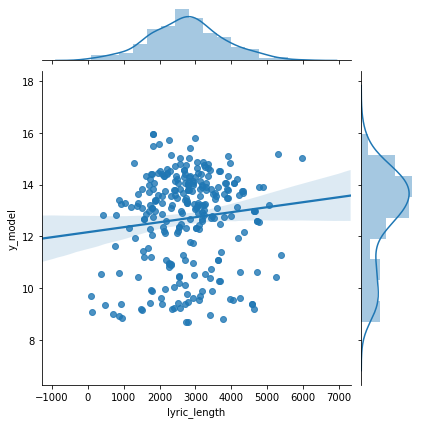

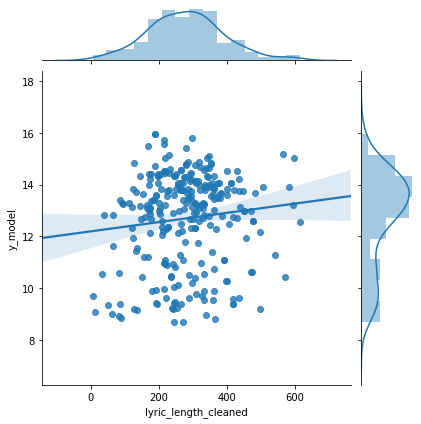

In [24]:
data["lyric_length"] = data["lyrics"].apply(lambda d: len(d)) 
data["lyric_length_cleaned"] = data["cleaned_lyrics"].apply(lambda d: len(d)) 

sns.jointplot(x="lyric_length",y="y_model",data=data, kind="reg")
sns.jointplot(x="lyric_length_cleaned",y="y_model",data=data, kind="reg")

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_lyrics)
X_tfidf = tfidf_vect.fit_transform(data['lyrics'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df

,,05,06,07,09,1,10,100,10000,101,...,zion,zip,zipper,ziti,zo,zodiac,zoe,zombi,zone,zs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.19168,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [37]:
final_data = pd.concat([data[["y_binary", "Verse", "Chorus", "lines", "lyric_length_cleaned"]], X_tfidf_df], axis = 1).dropna()

In [77]:
final_data.dropna(inplace = True)
X = final_data.drop("y_binary", axis = 1)
y = final_data["y_binary"]

In [78]:
X

,Verse,Chorus,lines,lyric_length_cleaned,,05,06,07,09,1,...,zion,zip,zipper,ziti,zo,zodiac,zoe,zombi,zone,zs
0,1.0,0.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,1.0,2.0,34.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,2.0,3.0,65.0,278.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,2.0,2.0,48.0,169.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,2.0,0.0,49.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.19168,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,6.0,0.0,125.0,614.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
267,2.0,1.0,59.0,243.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
268,0.0,0.0,73.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
269,3.0,0.0,70.0,173.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [79]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [84]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 0.2 / Recall: 0.062 / Accuracy: 0.642
Est: 10 / Depth: 20 ---- Precision: 0.333 / Recall: 0.125 / Accuracy: 0.66
Est: 10 / Depth: 30 ---- Precision: 0.4 / Recall: 0.125 / Accuracy: 0.679
Est: 10 / Depth: None ---- Precision: 0.25 / Recall: 0.062 / Accuracy: 0.66
Est: 50 / Depth: 10 ---- Precision: 0.333 / Recall: 0.062 / Accuracy: 0.679
Est: 50 / Depth: 20 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.642
Est: 50 / Depth: 30 ---- Precision: 0.333 / Recall: 0.062 / Accuracy: 0.679
Est: 50 / Depth: None ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.66
Est: 100 / Depth: 10 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.66
Est: 100 / Depth: 20 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.66
Est: 100 / Depth: 30 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.66
Est: 100 / Depth: None ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.66
